In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
dataset = pd.read_csv('/Users/rahulkosamkar/Documents/Data_Science/Deep Learning/Complete-Deep-Learning-master/ANN/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)



In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout



In [10]:
# Initialising the ANN
classifier = Sequential()

In [14]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))



In [15]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [17]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)


Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.6842 - accuracy: 0.6072 - val_loss: 0.5850 - val_accuracy: 0.7281
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5557 - accuracy: 0.7673 - val_loss: 0.5313 - val_accuracy: 0.7849
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5166 - accuracy: 0.7960 - val_loss: 0.5018 - val_accuracy: 0.7963
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4929 - accuracy: 0.7983 - val_loss: 0.4838 - val_accuracy: 0.7974
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4753 - accuracy: 0.8011 - val_loss: 0.4690 - val_accuracy: 0.8035
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4588 - accuracy: 0.8091 - val_loss: 0.4557 - val_accuracy: 0.8095
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4441 - accuracy: 0.8155 - val_loss: 0.4446 - val_accuracy: 0.8148

In [21]:
# list all data in history

print(model_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


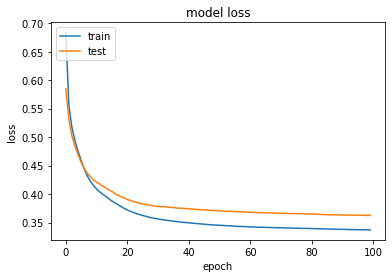

In [28]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [25]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1509   86]
 [ 203  202]]


In [27]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)


0.8555
